In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [11]:
# Datos (Tamaño en m², Precio en USD)
data1 = {
    'Tamaño': [10,40, 50, 60, 70, 80, 45, 55, 65, 75, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270],
    'Precio': [20,100, 150, 180, 220, 260, 130, 160, 190, 210, 250, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660]
}

Intercepto (β0): 46.42816510311707
Coeficiente (Tamaño, β1): [2.36884985]


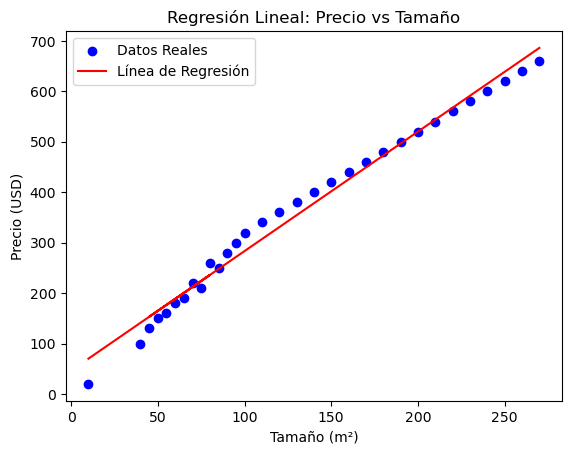

In [12]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(data1)

# Variables independientes (Tamaño y Habitaciones) y dependiente (Precio)
X = df[['Tamaño']]
y = df['Precio']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Tamaño y Habitaciones)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Tamaño, β1): {beta_1}")

# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['Tamaño'], y, color='blue', label='Datos Reales')
plt.plot(df['Tamaño'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio vs Tamaño')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


In [6]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[55], [65]])  # Nuevos valores (Tamaño, Habitaciones)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Tamaño: {nuevo_X[i][0]} m²): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Tamaño: 55 m²): 0.50 USD
Predicción 2 para (Tamaño: 65 m²): 48.45 USD


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Regresion Lineal Multiple

In [13]:
# Datos (Tamaño en m², Precio en USD)
data2 = {
    'Tamaño': [40, 50, 60, 70, 80, 45, 55, 65, 75, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270],
    'Precio': [100, 150, 180, 220, 260, 130, 160, 190, 210, 250, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660],
    'Habitaciones': [1, 2, 2, 3, 4, 1, 2, 3, 3, 4, 2, 2, 3, 4, 3, 2, 3, 4, 4, 5, 3, 3, 4, 5, 4, 4, 5, 5, 5, 6]
}

Intercepto (β0): 48.600605931238135
Coeficiente (Tamaño, β1): 2.273346751909985
Coeficiente (Habitaciones, β2): 3.765606625302147


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


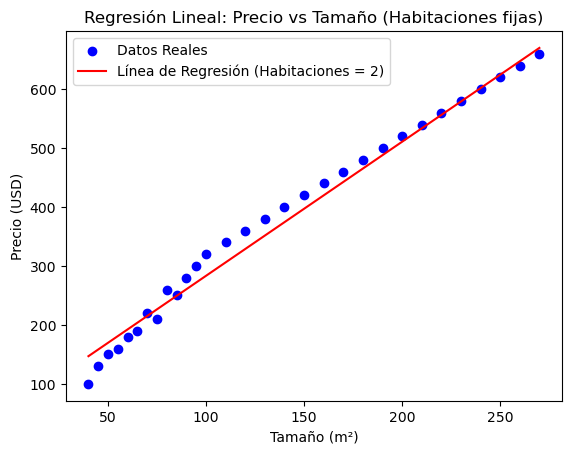

In [14]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(data2)

# Variables independientes (Tamaño y Habitaciones) y dependiente (Precio)
X = df[['Tamaño', 'Habitaciones']]
y = df['Precio']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (Tamaño y Habitaciones)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Tamaño, β1): {beta_1}")
print(f"Coeficiente (Habitaciones, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante el número de habitaciones)
habitaciones_fijas = 2  # Fijar el número de habitaciones en 2 para el gráfico
tamaño_range = np.linspace(df['Tamaño'].min(), df['Tamaño'].max(), 100)

# Predecir manteniendo las habitaciones constantes
predicciones_fijas = modelo.predict(np.column_stack((tamaño_range, np.full_like(tamaño_range, habitaciones_fijas))))

# Graficar los datos reales y la línea de regresión
plt.scatter(df['Tamaño'], y, color='blue', label='Datos Reales')
plt.plot(tamaño_range, predicciones_fijas, color='red', label=f'Línea de Regresión (Habitaciones = {habitaciones_fijas})')
plt.title('Regresión Lineal: Precio vs Tamaño (Habitaciones fijas)')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()



In [15]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[55, 2], [65, 3]])  # Nuevos valores (Tamaño, Habitaciones)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Tamaño: {nuevo_X[i][0]} m², Habitaciones: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Tamaño: 55 m², Habitaciones: 2): 181.17 USD
Predicción 2 para (Tamaño: 65 m², Habitaciones: 3): 207.66 USD


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos (suponiendo que tienes el dataset con 30 ejemplos de tamaño, habitaciones y precio)
# Por ejemplo, los datos se pueden construir como arrays o un DataFrame

X = df[['Tamaño', 'Habitaciones']]
y = df['Precio']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')


R² (Coeficiente de determinación): 0.9861789740257229
Error Absoluto Medio (MAE): 16.925525590020133
